# ***Predicting Customer Churn in a Telecommunications Company***

**Objective**

The primary objective of this project is to develop a predictive model that can identify customers at risk of churning, enabling the company to take proactive measures to retain them.

**Data Collection and Preprocessing**

We used the Telco Customer Churn dataset from Kaggle. The preprocessing steps included handling missing values, encoding categorical variables, and scaling features.


**Loading the Dataset:**


*   The dataset was loaded into a pandas DataFrame.
*   Initial rows were displayed to understand the structure of the dataset.


**Handling Missing Values:**


*   Missing values in the TotalCharges column were addressed. Rows with missing values in this column were dropped
*   Spaces in TotalCharges were replaced with NaN, and any remaining rows with NaN values were dropped.

*   The TotalCharges column was converted to numeric.

**Encoding Categorical Variables:**


*   Categorical variables were encoded using LabelEncoder, except for customerID.

**Splitting the Data:**



*   The data was split into features (X) and target (y).
*   The data was further split into training and testing sets using an 80-20 split.

**Scaling the Features:**


*   Features were standardized using StandardScaler.











In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Handle missing values
df = df.dropna(subset=['TotalCharges'])
df['TotalCharges'] = df['TotalCharges'].str.strip().replace('', pd.NA)
df = df.dropna(subset=['TotalCharges'])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Encode categorical variables
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object' and column != 'customerID':
        df[column] = label_encoder.fit_transform(df[column])

# Split the data into features and target
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Exploratory Data Analysis (EDA)**

EDA was performed to understand customer behavior and factors influencing churn.

**Distribution of Churn:**


*   Visualized the distribution of the target variable (Churn)

**Correlation Matrix:**


*   Calculated and visualized the correlation matrix to identify relationships between features.





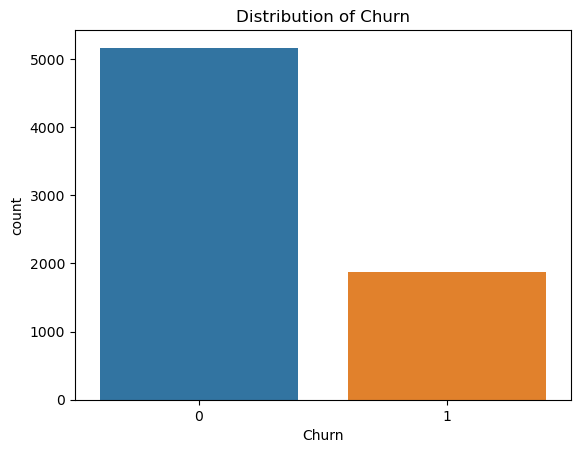

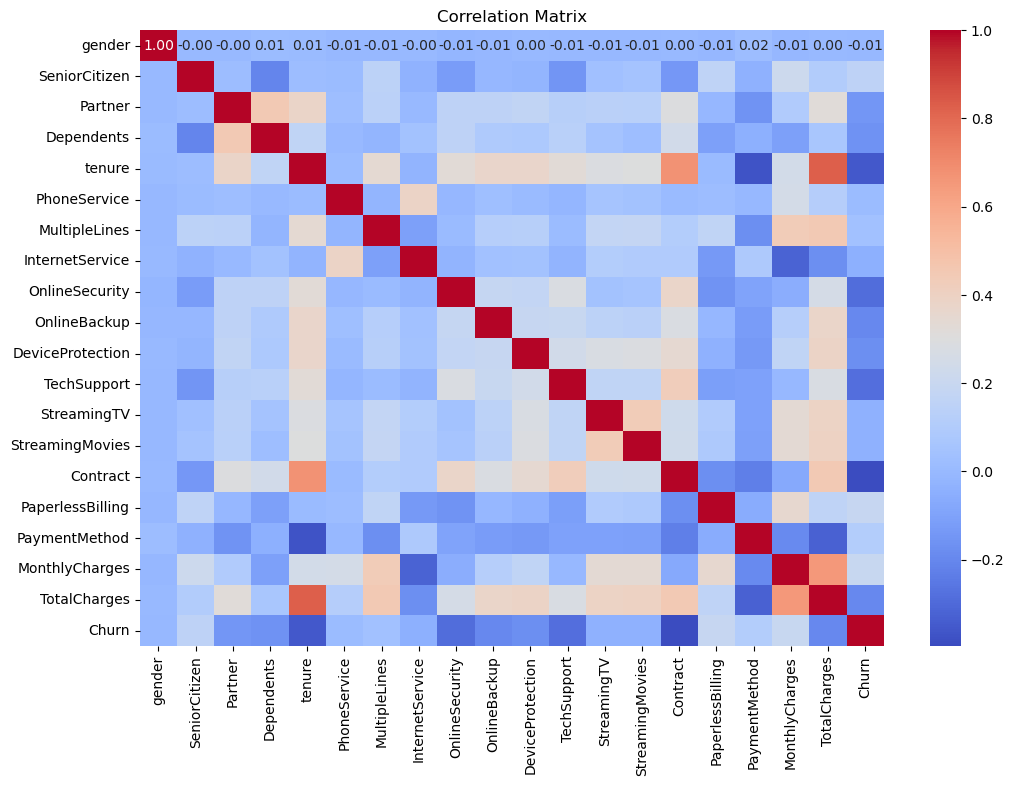

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

# Remove non-numeric columns for correlation matrix calculation
df_numeric = df.drop(columns=['customerID'])

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Feature Engineering**

New features were created to enhance the predictive power of the models.

**Polynomial Features and Interaction Terms:**


*   Created interaction features and polynomial features using PolynomialFeatures.



In [3]:
from sklearn.preprocessing import PolynomialFeatures

# Creating interaction features and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Convert the polynomial features into a DataFrame to examine them
poly_features = poly.get_feature_names_out(X.columns)
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_features)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_features)

print(X_train_poly_df.head())

# Update the training and testing sets
X_train = X_train_poly
X_test = X_test_poly


     gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0 -1.013784       -0.43759 -0.962481   -0.653684  0.434674     -3.040707   
1  0.986404       -0.43759 -0.962481   -0.653684 -1.195652      0.328871   
2 -1.013784       -0.43759  1.038981   -0.653684  0.923772      0.328871   
3  0.986404       -0.43759  1.038981    1.529791  0.516190      0.328871   
4 -1.013784       -0.43759  1.038981    1.529791  0.923772      0.328871   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0       0.072427        -1.188460       -0.924149     -1.037445  ...   
1      -0.983020        -1.188460       -0.924149     -1.037445  ...   
2       1.127874         0.165345       -0.924149     -1.037445  ...   
3      -0.983020        -1.188460        1.403291     -1.037445  ...   
4       1.127874         0.165345        1.403291     -1.037445  ...   

   Contract PaperlessBilling  Contract PaymentMethod  Contract MonthlyCharges  \
0                  -0.689989 

**Building the Churn Prediction Model**

Two models were chosen for churn prediction: Random Forest and Logistic Regression.

**Model Initialization and Training:**


*   Initialized and trained both Random Forest and Logistic Regression models.

**Making Predictions:**


*   Made predictions on the test set using both models.





In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)


**Model Evaluation**

The models were evaluated using accuracy, precision, recall, and F1-score.

In [5]:
# Evaluate the Random Forest model
rf_metrics = {
    'Accuracy': accuracy_score(y_test, rf_predictions),
    'Precision': precision_score(y_test, rf_predictions),
    'Recall': recall_score(y_test, rf_predictions),
    'F1-Score': f1_score(y_test, rf_predictions)
}

# Evaluate the Logistic Regression model
lr_metrics = {
    'Accuracy': accuracy_score(y_test, lr_predictions),
    'Precision': precision_score(y_test, lr_predictions),
    'Recall': recall_score(y_test, lr_predictions),
    'F1-Score': f1_score(y_test, lr_predictions)
}

print('Random Forest Metrics:', rf_metrics)
print('Logistic Regression Metrics:', lr_metrics)


Random Forest Metrics: {'Accuracy': 0.7853589196872779, 'Precision': 0.6313868613138686, 'Recall': 0.4625668449197861, 'F1-Score': 0.5339506172839505}
Logistic Regression Metrics: {'Accuracy': 0.7967306325515281, 'Precision': 0.6447368421052632, 'Recall': 0.5240641711229946, 'F1-Score': 0.5781710914454277}


**Challenges Faced**

**Handling Missing Values:**


*   The TotalCharges column contained missing values and spaces that needed to be addressed.

**Encoding Categorical Variables:**


*   Ensuring all categorical variables were properly encoded, especially with a mix of numeric and categorical data.

**Feature Engineering:**



*   Creating meaningful interaction and polynomial features to improve model performance.

**Model Selection and Tuning:**


*   Deciding on suitable models and tuning them for optimal performance.

**Conclusion**

Based on the evaluation metrics, both models performed reasonably well in identifying customers at risk of churning. The next steps could involve further hyperparameter tuning and exploring additional advanced models to improve performance.





